<a href="https://colab.research.google.com/github/nehasingh112/ULMFiT_Text_Classification/blob/master/Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install boto3 pandas
#import boto3
import pandas as pd
import numpy as np
import io
from smart_open import smart_open
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date



# Loading the Data

I initially tried loading file from local directory but the data seem incompatible with the process (encoding, EOF, style etc.) and after ingoring everything I was missing huge number of values so now I am using smart_open python 3 library for efficient streaming of very large files which supports on-the-fly (de-)compression for varietu of different formats. smart_open supports a wide range of transport options out of the box, including:S3, HTTP, HTTPS (read-only), SSH, SCP and SFTP, WebHDFS, GCS, Azure Blob Storage so it fits the style.


In [ ]:
positions_descriptions_df = pd.read_csv(smart_open("https://info0.s3.us-east-2.amazonaws.com/recruitment/positions_descriptions.csv"))
print(positions_descriptions_df.info())
positions_descriptions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377746 entries, 0 to 377745
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   377746 non-null  int64 
 1   user_id      377746 non-null  object
 2   jobtitle     376297 non-null  object
 3   startdate    368687 non-null  object
 4   enddate      270515 non-null  object
 5   description  22247 non-null   object
dtypes: int64(1), object(5)
memory usage: 17.3+ MB
None


,Unnamed: 0,user_id,jobtitle,startdate,enddate,description
0,0,xPnF8aBtmVHMUJgXu4FhFQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,manager_|_retail,1993-01-01,1999-01-01,Customer Service|Sales Manager with expertise ...
1,1,cSSpv5DU46Epq7jLKmHDYQ5+2cvffV/mNepQVJd0smgtpB...,consultant,2017-09-01,2017-12-01,• Analyzed current marketing strategy for loca...
2,2,kTlIZZU3vXt4Q90RzMQUAQ5+2cvffV/mNepQVJd0smgtpB...,gmac,1995-08-01,1996-06-01,Gestión de Cartera entre 30 60 y 90 días de mora
3,3,qHioGzN4ZvCgR+5MtGt7mw5+2cvffV/mNepQVJd0smgtpB...,research_collaborator_|_civil_engineering,2007-10-01,2008-01-01,Developer of real time operating systems as di...
4,4,AXh20t4URiK2Xnt1sKGyjQ5+2cvffV/mNepQVJd0smgtpB...,account_manager,2013-08-01,2013-12-01,"Account manager, events coordinator. Managemen..."


In [ ]:
education_df = pd.read_csv(smart_open("https://info0.s3.us-east-2.amazonaws.com/recruitment/education.csv"))
print(education_df.info())
education_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226184 entries, 0 to 226183
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    226184 non-null  object
 1   major      162346 non-null  object
 2   startdate  197556 non-null  object
 3   enddate    190658 non-null  object
dtypes: object(4)
memory usage: 6.9+ MB
None


,user_id,major,startdate,enddate
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Master of Viticulture,2006-01-01,2008-01-01
1,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Bachelor of horticulture,2001-01-01,2005-01-01
2,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,WSET Level 3,2015-01-01,2015-01-01
3,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Graduated Diploma,2008-01-01,2009-01-01
4,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,Lingüística Aplicada en la Enseñanza del Inglé...,2013-01-01,2016-01-01


In [ ]:
jobtitle_seniority_df = pd.read_csv(smart_open("https://info0.s3.us-east-2.amazonaws.com/recruitment/jobtitle_seniority.csv"))
print(jobtitle_seniority_df.info())
jobtitle_seniority_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416295 entries, 0 to 416294
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    416295 non-null  object 
 1   jobtitle   414290 non-null  object 
 2   seniority  416295 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.5+ MB
None


,user_id,jobtitle,seniority
0,SbYa9XFYmy40AbpQIbr4cw5+2cvffV/mNepQVJd0smgtpB...,ict_manager,5.181348
1,5NTieg1m6jKFiY8Py3K+2jr+/k0/DTn/+K+fv+DIJSUQ20...,emergency_room_physician_assistant_banner_chur...,2.866780
2,R58XldIpOAmT8Tt3/x+2/w5+2cvffV/mNepQVJd0smgtpB...,marketing_promotions,3.559404
3,Ks30ggQyMuLYOykWc4EoXGEWBgzjpZvPNepQVJd0smgtpB...,central_billing_assistant_development_manager,4.175832
4,MLsEj4gLE8oHM+mWTMnRMg5+2cvffV/mNepQVJd0smgtpB...,navegador,3.767998


In [ ]:
jobtitle_jobposting_df = pd.read_csv(smart_open("https://info0.s3.us-east-2.amazonaws.com/recruitment/jobtitle_jobpostings.csv"))
print(jobtitle_jobposting_df.info())
jobtitle_jobposting_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   100000 non-null  int64 
 1   jobtitle     100000 non-null  object
 2   description  100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB
None


,Unnamed: 0,jobtitle,description
0,481138,retail_store_manager_|_apparel_fashion,Retail Store Manager\n\nSkechers\n\nAlbuquerqu...
1,373039,warehouse_associate,This job has expired on Indeed\n\nReasons coul...
2,735905,merchandiser_|_wine_spirits,Merchandiser Atlantic\n\nSouthern Glazer’s Win...
3,569912,forklift_operator_|_logistics_supply_chain,"Forklift Operator\n\nSyncreon\n\nOlive Branch,..."
4,146471,service_technician,Service Technician\n\nRegier Equipment Company...


# Data Exploration for education dataset

In [ ]:
#education_df = pd.read_csv(smart_open("https://info0.s3.us-east-2.amazonaws.com/recruitment/education.csv"))
education_df['educaton_duration_days'] = pd.to_datetime(education_df['enddate'])- pd.to_datetime(education_df['startdate'])
education_df['education_duration_years'] = education_df['educaton_duration_days'] / np.timedelta64(1, 'Y')
education_df.info()
education_df.head()
#education_unique_df = education_df.drop_duplicates('user_id')
#education_unique_df['user_id'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226184 entries, 0 to 226183
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   user_id                   226184 non-null  object         
 1   major                     162346 non-null  object         
 2   startdate                 197556 non-null  object         
 3   enddate                   190658 non-null  object         
 4   educaton_duration_days    189246 non-null  timedelta64[ns]
 5   education_duration_years  189246 non-null  float64        
dtypes: float64(1), object(4), timedelta64[ns](1)
memory usage: 10.4+ MB


,user_id,major,startdate,enddate,educaton_duration_days,education_duration_years
0,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Master of Viticulture,2006-01-01,2008-01-01,730 days,1.998672
1,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Bachelor of horticulture,2001-01-01,2005-01-01,1461 days,4.000082
2,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,WSET Level 3,2015-01-01,2015-01-01,0 days,0.000000
3,hqSv727UD4f0Cr8QyA8+8g5+2cvffV/mNepQVJd0smgtpB...,Graduated Diploma,2008-01-01,2009-01-01,366 days,1.002074
4,H2fZcOtCvd7DXFbzglIkpA5+2cvffV/mNepQVJd0smgtpB...,Lingüística Aplicada en la Enseñanza del Inglé...,2013-01-01,2016-01-01,1095 days,2.998008


In [ ]:
print(education_df['user_id'].describe())
education_df.describe()


count                                                226184
unique                                               100000
top       JBrqCQYzF+vs0NvzCbRnIQ5+2cvffV/mNepQVJd0smgtpB...
freq                                                     44
Name: user_id, dtype: object


,educaton_duration_days,education_duration_years
count,189246,189246.000000
mean,1119 days 07:28:29.432240384,3.064571
std,960 days 09:20:13.970033168,2.629456
min,-13514 days +00:00:00,-37.000075
25%,730 days 00:00:00,1.998672
50%,1096 days 00:00:00,3.000746
75%,1461 days 00:00:00,4.000082
max,76699 days 00:00:00,209.994730


There are 100k unique users but 226k instances, they might have more than 1 degree/certification/diploma/level of education so it is important to analyze the range of these years.
As we can see there are negative and extremely high number of education years which is not reasonable so we will get rid of those for making our dataset morelike true representetation of the real-world 

In [ ]:
Negative_education = education_df[education_df['education_duration_years']<0]
print(Negative_education.info())
Negative_education = Negative_education.groupby(['user_id','major']).sum()
Negative_education

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 1881 to 223151
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   user_id                   208 non-null    object         
 1   major                     161 non-null    object         
 2   startdate                 208 non-null    object         
 3   enddate                   208 non-null    object         
 4   educaton_duration_days    208 non-null    timedelta64[ns]
 5   education_duration_years  208 non-null    float64        
dtypes: float64(1), object(4), timedelta64[ns](1)
memory usage: 11.4+ KB
None


,,education_duration_years
user_id,major,
+LcYEyG8cNOjhgYuLZ6glA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,Bacharelado em Administração,-12.495808
+R/dplUvB26YHWOu6eBlSA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,High school Diploma,-18.834062
+Ra0ZAOrlalfy8fa1B0PxXAG1BvSkUYANepQVJd0smgtpBr4MGMFJQ==,"High School, Business",-7.584002
+ht2VDXp8fNaFzItp0UGkHAG1BvSkUYANepQVJd0smgtpBr4MGMFJQ==,High School,-0.251887
+pGylK45chH4GXmHEc3q4w4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,Bachelor of Arts,-19.162611
...,...,...
yyOjJT7nv8PwyhQZVCk2TXAG1BvSkUYANepQVJd0smgtpBr4MGMFJQ==,"High School, none",-1.916535
zGlgYPWlX9MF8FQBmyInzw4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,BA (Hons) - 2:1,-0.999336
zMvFDWG/TcPORcB1NBXofg4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,Bsc,-12.000246


208 instances (144 users) have negative education years exprerience, it could be either mistakely flipped start/end date or wrong values. I can either delete it or take mod of these values to avoid inconsistenties in sutucture sum operation. I am gonna delete them for now.


In [ ]:
Negative_education_idx = education_df[education_df['education_duration_years']<0].index

education_df.drop(Negative_education_idx, inplace=True)


In [ ]:
super_education = education_df[education_df['education_duration_years']>25]
print(super_education.info())
super_education = super_education.groupby(['user_id','major']).sum()
super_education

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 289 to 223782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   user_id                   202 non-null    object         
 1   major                     157 non-null    object         
 2   startdate                 202 non-null    object         
 3   enddate                   202 non-null    object         
 4   educaton_duration_days    202 non-null    timedelta64[ns]
 5   education_duration_years  202 non-null    float64        
dtypes: float64(1), object(4), timedelta64[ns](1)
memory usage: 11.0+ KB
None


,,education_duration_years
user_id,major,
+XKAbgeRiJNDlbT6YmWfBA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,Doctor of Philosophy (Ph.D.),29.002649
/UaKDDpspVRpuvNII74aow4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,Undergrad,32.000657
0ODi9jDnFjZfNuly1m51zg5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,Especialista,33.999329
1jx5/GO2pMPQhi1m3wVr+XAG1BvSkUYANepQVJd0smgtpBr4MGMFJQ==,astrology,41.999493
2znw1Ai5GP5OO//gaZazkw5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,Eğitim Bilimleri Fakiltesi,25.999165
...,...,...
ydJazoiCzf5SRza9OeazTg4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,Bibleology,32.000657
ygH0ojU/lE8exfUJ+2eebQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,x dEgReE,56.001150
yggyNKkshD9sLqVbDEwwUw5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,BECHLOR OF COMMERCE,35.001403


It is possible for some users to have muliple education or certifications/courses at the same time and taking a group by sum for each of them would be higher than the actual experience but traditionally most people do one degree major at one time then move on to another degree so going towards summation calculation for the users having multiple major/degree/certifications experiences.

In [ ]:
super_education_idx = education_df[education_df['education_duration_years']>50].index

education_df.drop(super_education_idx, inplace=True)


In [ ]:
education_df.describe()

,educaton_duration_days,education_duration_years
count,189005,189005.000000
mean,1118 days 20:12:41.960867504,3.063286
std,861 days 02:01:21.562525152,2.357569
min,0 days 00:00:00,0.000000
25%,730 days 00:00:00,1.998672
50%,1096 days 00:00:00,3.000746
75%,1461 days 00:00:00,4.000082
max,18262 days 00:00:00,49.999658


In [ ]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225943 entries, 0 to 226183
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   user_id                   225943 non-null  object         
 1   major                     162156 non-null  object         
 2   startdate                 197315 non-null  object         
 3   enddate                   190417 non-null  object         
 4   educaton_duration_days    189005 non-null  timedelta64[ns]
 5   education_duration_years  189005 non-null  float64        
dtypes: float64(1), object(4), timedelta64[ns](1)
memory usage: 12.1+ MB


In [ ]:
education_df['user_id'].value_counts().head(20)

JBrqCQYzF+vs0NvzCbRnIQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==    44
joaxVgqkpTvYMzC5yha0tQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==    38
gK/XUmPPwHFc4V2oQ8pIyHAG1BvSkUYANepQVJd0smgtpBr4MGMFJQ==    30
h6ZTSBvtdzFRr6jLaNBaYQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==    30
ZBu2ZkJyt1gXd7iwSarhuA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==    28
CHvb7FMLAqHers3tWtNP4A5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==    26
4AvaHjAouxB9suLx0J5fvw4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==    24
11OMVXZlY7Ln8ymZj1WzSw5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==    24
A71HC7+xZaZUZsyb/zMJuA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==    24
A5ZRM9t4dL2qjNEcxZJ5QA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==    23
jTCTn2Ec2d9PBOJyKpMAHA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==    23
p2OTceFNDXConYA7vouvDQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==    23
yj3b0Rli4sTexPWP3OzF9w5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==    22
Ocq10gz99bQtsaL38RZLcg4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==    22
Y5f3/Rq9iz9kCJAk3c18zQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==    22
DtQUtAOCsZ6PUu/nT+3VNA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ=

We can see there are same users with multiple rows so going by the simple calculation and instead of taking the summation of all the users education experience, we focus on the people with undergrad degree and extract their age from the startdate of the users 

## Getting age data just based on bachelors degree

in this dataset bachelors, masters, highscool, diploma, PhD are some of the major education but different type of bachelors amonts to the highest numbers so extracted the bachelors details and calculated the age from their bachelor's start date (probably and mosly they were 18, if not all of them) 
###assumption: users started their bachlors degree at/around 18

In [ ]:
#Normalizing degree names for standard and simple age extraction
#education_df['Normalized_major'] = education_df['major'].replace(["High School","Diploma","Associate's degree","High School Diploma","Associates",
#                                                                  "Associate of Science (A.S.)","Associate’s Degree","Associate of Arts (A.A.)","Associate of Arts (AA)",
#                                                                  "AA"],
#                                                                 'HS/Associate')

education_df['Normalized_major'] = education_df['major'].replace(['BS','BA','B.S.','B.A.',"Bachelor's Degree","Bachelor's degree","Bachelor’s Degree"
                                                                  'Bachelor of Business Administration (B.B.A.)','Bachelor of Science (BSc)',
                                                                  'Bachelor of Arts','Bachelor of Arts (BA)','Bachelor of Science','Bachelor of Arts (B.A.)',
                                                                  "Bachelor of Science (BS)","Bachelor of Science (B.S.)","Bachelor of Engineering (B.E.)",
                                                                  "Bachelor of Applied Science (B.A.Sc.)","Bachelor of Commerce (B.Com.)","Bachelor of Technology (B.Tech.)",
                                                                  "Bachelor of Science - BS","Bachelor of Arts - BA","BSc","BBA","Bachelor’s Degree",
                                                                  "Bachelor","Bachelor of Business Administration (BBA)","Bachelor of Business Administration (B.B.A.)",
                                                                  "Bachelor of Science (B.Sc.)","Business Administration and Management","Bachelors of Science",
                                                                  "Bachelor of Engineering (B.Eng.)","BE","Bachelor of Engineering (BE)",
                                                                  "Business Administration","Bachelor of Applied Science (BASc)","Bachelor of Engineering (BEng)",
                                                                  "B.S","B.Tech","Bachelor of Engineering","Bachelor of Engineering (BEng)","Bachelor's",
                                                                  "Engineer's degree","Bachelor of Fine Arts (BFA)","BSN","Bacharelado em Administração","B.E",
                                                                  "B.Sc.","BSBA"],
                                                                 'Bachelors')
#education_df['Normalized_major'] = education_df['Normalized_major'].replace(['MS','MA','M.S.','M.A.',"Master's degree","Master","Masters","Master's Degree","MBA",
#                                                                  'Master of Business Administration (M.B.A.)','Master of Science (MSc)',
#                                                                  'Master of Arts','Master of Arts (M.A.)','Master of Science','Master of Science (MS)',
#                                                                  "Master of Science - MS","Master of Arts (MA)","Master of Science (M.Sc.)","MSc",
#                                                                  "Master of Science (M.S.)","Master’s Degree","Master of Business Administration (MBA)",
#                                                                  "Master of Education (M.Ed.)"],
#                                                                 'Masters')

print(education_df['major'].value_counts())
print(education_df['Normalized_major'].value_counts())


Bachelor's degree                                                        5936
BS                                                                       3095
Master's degree                                                          3060
Bachelor of Arts (B.A.)                                                  2985
BA                                                                       2927
                                                                         ... 
Gymnasielärarexamen i biologi och religion                                  1
medicine kandidat                                                           1
Diploma de finalizare a studiilor gimnaziale                                1
Cand. Polit. (M.sc.)                                                        1
Tecnico superior en Seguridad e Higiene ,Control Ambiental Industrial       1
Name: major, Length: 44817, dtype: int64
Bachelors                                                                41287
Master's degree       

In [ ]:
undergrad_education = education_df[education_df['Normalized_major']=="Bachelors"]
undergrad_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41287 entries, 8 to 226173
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   user_id                   41287 non-null  object         
 1   major                     41287 non-null  object         
 2   startdate                 36267 non-null  object         
 3   enddate                   35650 non-null  object         
 4   educaton_duration_days    35246 non-null  timedelta64[ns]
 5   education_duration_years  35246 non-null  float64        
 6   Normalized_major          41287 non-null  object         
dtypes: float64(1), object(5), timedelta64[ns](1)
memory usage: 2.5+ MB


with combining basic bachelors degree namewise we have 41K instances which can be a good subset for age calculation based on the average assumption of peole start their undergrad degree around the age 18.


In [ ]:
undergrad_education.describe()

,educaton_duration_days,education_duration_years
count,32082,32082.000000
mean,1287 days 14:41:02.838964016,3.525361
std,376 days 01:16:07.385940100,1.029598
min,0 days 00:00:00,0.000000
25%,1096 days 00:00:00,3.000746
50%,1461 days 00:00:00,4.000082
75%,1461 days 00:00:00,4.000082
max,1826 days 00:00:00,4.999418


since we only took into consideration bachelors degree and people tent to fining it in 4-5 years so removing others as outliers in this dataset for ground truth labelling.
### assumption: finish undergrad in 4-5 years mostly 

In [ ]:
# deleting the outlier for better age rule as many people (half, according to survey) if they are under 25, most likely to finish their undergrad around 48 months

outlier_education_idx = undergrad_education[undergrad_education['education_duration_years']>5].index
undergrad_education.drop(outlier_education_idx, inplace=True)
undergrad_education.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,user_id,major,startdate,enddate,educaton_duration_days,education_duration_years,Normalized_major
8,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,BA,2008-01-01,2012-01-01,1461 days,4.000082,Bachelors
10,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,BA,2008-01-01,2012-01-01,1461 days,4.000082,Bachelors
14,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,Bachelor of Science (BSc),1980-01-01,1983-01-01,1096 days,3.000746,Bachelors
22,sNbHs3DTxv39myeCZxs3SQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,BS,1998-01-01,2001-01-01,1096 days,3.000746,Bachelors
34,C8rLGp6IjTIYvv6XWHahWQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,B.A.,2007-01-01,2011-01-01,1461 days,4.000082,Bachelors


In [ ]:
undergrad_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38123 entries, 8 to 226157
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   user_id                   38123 non-null  object         
 1   major                     38123 non-null  object         
 2   startdate                 33103 non-null  object         
 3   enddate                   32486 non-null  object         
 4   educaton_duration_days    32082 non-null  timedelta64[ns]
 5   education_duration_years  32082 non-null  float64        
 6   Normalized_major          38123 non-null  object         
dtypes: float64(1), object(5), timedelta64[ns](1)
memory usage: 3.6+ MB


### Age calculation: creating time difference from today and adding 18

In [ ]:
undergrad_education["current_date"] = datetime.datetime.now().date()
undergrad_education["Age"] = pd.to_datetime(undergrad_education["current_date"]) - pd.to_datetime(undergrad_education['startdate'])
undergrad_education["Age"] = undergrad_education['Age'] / np.timedelta64(1, 'Y')
undergrad_education['Age'] = undergrad_education['Age'] +18
undergrad_education.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,user_id,major,startdate,enddate,educaton_duration_days,education_duration_years,Normalized_major,current_date,Age
8,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,BA,2008-01-01,2012-01-01,1461 days,4.000082,Bachelors,2021-05-05,31.341821
10,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,BA,2008-01-01,2012-01-01,1461 days,4.000082,Bachelors,2021-05-05,31.341821
14,ChHu2phrrJ6TeTC/TrwnCA4ZM3TcQvn1bQ/jHgHWG0kf/b...,Bachelor of Science (BSc),1980-01-01,1983-01-01,1096 days,3.000746,Bachelors,2021-05-05,59.342396
22,sNbHs3DTxv39myeCZxs3SQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,BS,1998-01-01,2001-01-01,1096 days,3.000746,Bachelors,2021-05-05,41.340657
34,C8rLGp6IjTIYvv6XWHahWQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,B.A.,2007-01-01,2011-01-01,1461 days,4.000082,Bachelors,2021-05-05,32.341157


In [ ]:
undergrad_education['user_id'].describe()


count                                                 38123
unique                                                33816
top       4T6QXP5mgAzEcVIb/3BruA4ZM3TcQvn1bQ/jHgHWG0kf/b...
freq                                                      8
Name: user_id, dtype: object

38k data point with 33k almost unique users, which will serve as out input data for grount truth age.
I will merge them with position and seniority data set to get external features and build the regression model for age prediction

#  Data Exploration Analysis For position description dataset

calculating the days and years of experience for each instance by subtractive enddate with startdate.

In [ ]:
positions_descriptions_df['job_duration_days'] = pd.to_datetime(positions_descriptions_df['enddate'])- pd.to_datetime(positions_descriptions_df['startdate'])
positions_descriptions_df['job_duration_years'] = positions_descriptions_df['job_duration_days'] / np.timedelta64(1, 'Y')
print(positions_descriptions_df.info())
positions_descriptions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377746 entries, 0 to 377745
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   Unnamed: 0          377746 non-null  int64          
 1   user_id             377746 non-null  object         
 2   jobtitle            376297 non-null  object         
 3   startdate           368687 non-null  object         
 4   enddate             270515 non-null  object         
 5   description         22247 non-null   object         
 6   job_duration_days   270466 non-null  timedelta64[ns]
 7   job_duration_years  270466 non-null  float64        
dtypes: float64(1), int64(1), object(5), timedelta64[ns](1)
memory usage: 23.1+ MB
None


,Unnamed: 0,user_id,jobtitle,startdate,enddate,description,job_duration_days,job_duration_years
0,0,xPnF8aBtmVHMUJgXu4FhFQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,manager_|_retail,1993-01-01,1999-01-01,Customer Service|Sales Manager with expertise ...,2191 days,5.998754
1,1,cSSpv5DU46Epq7jLKmHDYQ5+2cvffV/mNepQVJd0smgtpB...,consultant,2017-09-01,2017-12-01,• Analyzed current marketing strategy for loca...,91 days,0.249150
2,2,kTlIZZU3vXt4Q90RzMQUAQ5+2cvffV/mNepQVJd0smgtpB...,gmac,1995-08-01,1996-06-01,Gestión de Cartera entre 30 60 y 90 días de mora,305 days,0.835062
3,3,qHioGzN4ZvCgR+5MtGt7mw5+2cvffV/mNepQVJd0smgtpB...,research_collaborator_|_civil_engineering,2007-10-01,2008-01-01,Developer of real time operating systems as di...,92 days,0.251887
4,4,AXh20t4URiK2Xnt1sKGyjQ5+2cvffV/mNepQVJd0smgtpB...,account_manager,2013-08-01,2013-12-01,"Account manager, events coordinator. Managemen...",122 days,0.334025


### Removing negative experience and super high experience 

In [ ]:
Negative_exp = positions_descriptions_df[positions_descriptions_df['job_duration_years']<0]
print(Negative_exp.info())
Negative_exp= Negative_exp.groupby(['user_id','jobtitle','job_duration_years']).sum()
Negative_exp

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 802 to 377195
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Unnamed: 0          1255 non-null   int64          
 1   user_id             1255 non-null   object         
 2   jobtitle            1253 non-null   object         
 3   startdate           1255 non-null   object         
 4   enddate             1255 non-null   object         
 5   description         50 non-null     object         
 6   job_duration_days   1255 non-null   timedelta64[ns]
 7   job_duration_years  1255 non-null   float64        
dtypes: float64(1), int64(1), object(5), timedelta64[ns](1)
memory usage: 88.2+ KB
None


Unnamed: 0
user_id                                            jobtitle                                   job_duration_years            
+/sKHm1rOxwYZQ0hgpicOg5+2cvffV/mNepQVJd0smgtpBr... violinist                                  -20.328960              222748
                                                   violinist_|_music                          -7.748277               225932
+0Hqf0uBmhMn0bb4nCA4vA5+2cvffV/mNepQVJd0smgtpBr... trainee_import_dept                        -0.164274               198556
+6D3+oNzUCLpgMtCj9mlTg5+2cvffV/mNepQVJd0smgtpBr... production_manager_china                   -3.750933                52840
+6DXfuKpB1lJnvSWZMkqDQ4ZM3TcQvn1bQ/jHgHWG0kf/bH... general_partner                            -19.001075              257763
...                                                                                                                      ...
zsbtkW2agusv6dopSFkTeQ5+2cvffV/mNepQVJd0smgtpBr... alumni_relations_intern_|_higher_education -18.001739              186331
zuBoOOPgKvSGMJcT+GosmQ5+2cvffV/mNepQVJd0smgtpBr... actuarial_assistant_|_financial_services   -9.166513               255244
zujT4iSF+bZbxO8lX6lgmQ4ZM3TcQvn1bQ/jHgHWG0kf/bH... director_sales_marketing_north_america     -12.750433              248796
zvMkf7CLwvlU44m/mYVlSJ/joSTLo5hZbQ/jHgHWG0kf/bH... english_teacher                            -0.914461               114442
zvYpaNz5ckuTYtXi0CM8sQ5+2cvffV/mNepQVJd0smgtpBr... registered_nurse                           -6.497053               298985

[1253 rows x 1 columns]

1255 instances (1253 users) have negative years exprerience, it could be either mistakely flipped start/end date or wrong values. I can either delete it or take mod of these values to avoid inconsistenties in suture sum operation.
I am gonna delete them for now. 

In [ ]:
#Deleting the negative years of experience
Negative_exp = positions_descriptions_df[positions_descriptions_df['job_duration_years']<0].index

positions_descriptions_df.drop(Negative_exp, inplace=True)


In [ ]:
super_exp = positions_descriptions_df[positions_descriptions_df['job_duration_years']>40]
print(super_exp.info())
super_exp= super_exp.groupby(['user_id','jobtitle','job_duration_years']).sum()
super_exp

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 2682 to 370649
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Unnamed: 0          85 non-null     int64          
 1   user_id             85 non-null     object         
 2   jobtitle            85 non-null     object         
 3   startdate           85 non-null     object         
 4   enddate             85 non-null     object         
 5   description         3 non-null      object         
 6   job_duration_days   85 non-null     timedelta64[ns]
 7   job_duration_years  85 non-null     float64        
dtypes: float64(1), int64(1), object(5), timedelta64[ns](1)
memory usage: 6.0+ KB
None


,,,Unnamed: 0
user_id,jobtitle,job_duration_years,
+brlwswF32W6B4DHJJ5IJA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,iraq_baghdad,49.082459,78134
+iLwd1Amya17KUNjajC18g5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,manufecturer,45.999576,256215
/waL+L+8GSGlGPJFHwxaaA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,social_work_consultant,40.000821,14190
0CvARjIMR1sJhwV3evqFm3AG1BvSkUYANepQVJd0smgtpBr4MGMFJQ==,test_engineer_|_information_technology_services,47.415074,253313
0ZW4V6mpSBSB1fznSbdlzA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,president,44.000904,358692
...,...,...,...
xZhaI5uY52LnB6Hxsjf72Q5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,designer,95.917096,228227
y3iWOO5tHgjOqZvYUKrdDA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==,escuela_vocacional_de_la_universidad_de_guadalajara,41.999493,274623
yH+W144rewXExDwoahQCCA4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==,bar,57.999822,27385


85 instances (85 users) have supe high years exprerience, it could be either entered mistakely or exagerated which will lead to more outliers and more out of range age determination. I can either delete it or take justify keeping them for each user to avoid outliers/extreme data points in structure sum operation. I am gonna delete them for now since it is not that big a number for 40+ years of experience.

In [ ]:
#Deleting the super high years of experience
super_exp = positions_descriptions_df[positions_descriptions_df['job_duration_years']>40].index
positions_descriptions_df.drop(super_exp, inplace=True)


It is possible for some users to have muliple job position at the same time and taking a group by sum for each of them would be higher than the actual experience but traditionally most people hold one position and move to another one after promotion/leaving/changing jobs so going towards summation calculation for the users having multiple job experiences. Same approach used for education data file.

In [ ]:
positions_descriptions_df['user_id'].value_counts()

CRVl6Qi6FjsGZng/y8E+zg4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==    100
rbwrHDTmAb5iOj/josW5uQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==     81
bBpn9NDjfza5z8zMxYySZA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==     68
a7rtb8EKY5/3a2gnNSmAFA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==     59
jezdW1GO7A9poKrnCMLNLw5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==     57
                                                           ... 
NQUaFQhRCZk2sm63ilV5AA5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==      1
mV4VLPG7IK6fI/unRuyHiQ5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==      1
ncCt3r/EimzqWIGYMwogow5+2cvffV/mNepQVJd0smgtpBr4MGMFJQ==      1
yD+DPUVJWwE/riULHJc+MQ4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==      1
2hCvJDdalAQbcgsh5Mj02Q4ZM3TcQvn1bQ/jHgHWG0kf/bHrn17MPg==      1
Name: user_id, Length: 81450, dtype: int64

In [ ]:
#positions_descriptions_unique_df =positions_descriptions_df.drop_duplicates('user_id')
#positions_descriptions_unique_df.info()
positions_descriptions_df['user_id'].describe()

count                                                376406
unique                                                81450
top       CRVl6Qi6FjsGZng/y8E+zg4ZM3TcQvn1bQ/jHgHWG0kf/b...
freq                                                    100
Name: user_id, dtype: object

As it can be seen from the description above that we have only almost 81k unique users but almost 376k instances which mean single users have multiple job experience entered separately so there is a need to groupby each user and have a total experience as a cumulative sum for each individual to preare for the training set. But this sum would be super high and if we only stick to unique users we might loose a lot od data points.
## Merge with undergrad education data
 

In [ ]:
education_job = pd.merge(undergrad_education[['user_id','education_duration_years','Age']], 
              positions_descriptions_df[['user_id','jobtitle','description', 'job_duration_years']],
              on='user_id',how='inner')
print(education_job['user_id'].describe())
education_job.info()

count                                                157611
unique                                                29003
top       4zbz/K2/Es7QAQ9c3ErsNLbJBBZhf6frbQ/jHgHWG0kf/b...
freq                                                    104
Name: user_id, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 157611 entries, 0 to 157610
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   157611 non-null  object 
 1   education_duration_years  133892 non-null  float64
 2   Age                       138205 non-null  float64
 3   jobtitle                  157293 non-null  object 
 4   description               8288 non-null    object 
 5   job_duration_years        115519 non-null  float64
dtypes: float64(3), object(3)
memory usage: 8.4+ MB


In [ ]:
education_job.describe()

,education_duration_years,Age,job_duration_years
count,133892.000000,138205.000000,115519.000000
mean,3.506935,39.180595,2.625858
std,1.031743,11.540300,3.461102
min,0.000000,18.339500,0.000000
25%,3.000746,30.339747,0.665311
50%,4.000082,36.341239,1.582510
75%,4.000082,45.340739,3.162283
max,4.999418,139.341301,39.083623


the merged dataset have 29k unique users but 138k data instances to test the model on
## Data scatter plot for range estimation/ anomaly detection/ outliers/ error entries

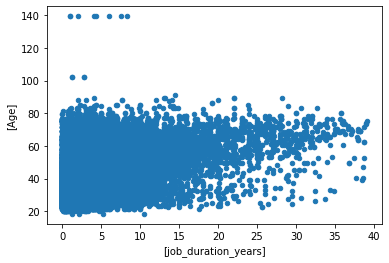

In [ ]:
education_job.plot.scatter(x=['job_duration_years'], y=['Age'])

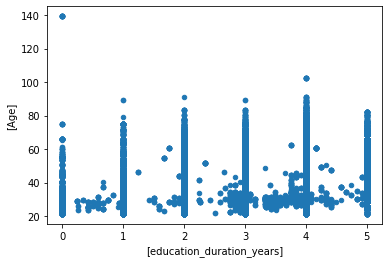

In [ ]:
education_job.plot.scatter(x=['education_duration_years'], y=['Age'])

Based on the scatter plot, there are few data points which suggest age as 140, which seems like an outlier and bit of anamoly in this case as we have carefully chooses people with undergrad degree. so deleting those data points.


In [ ]:
education_job_outlier = education_job[education_job['Age']>130]
education_job_outlier

,user_id,education_duration_years,Age,jobtitle,description,job_duration_years
48676,tRol7RwR8+1ajgty+LS7HQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,0.0,139.341301,communications_director,NaN,8.334189
48677,tRol7RwR8+1ajgty+LS7HQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,0.0,139.341301,reporter,NaN,6.001492
48678,tRol7RwR8+1ajgty+LS7HQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,0.0,139.341301,director_communications,NaN,NaN
48679,tRol7RwR8+1ajgty+LS7HQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,0.0,139.341301,reporter,NaN,0.999336
48680,tRol7RwR8+1ajgty+LS7HQ4ZM3TcQvn1bQ/jHgHWG0kf/b...,0.0,139.341301,reporter,NaN,4.000082
146579,Qd+XJ3X9mjsZyWTVqROsog5+2cvffV/mNepQVJd0smgtpB...,0.0,139.341301,consultant_|_management_consulting,NaN,NaN
146580,Qd+XJ3X9mjsZyWTVqROsog5+2cvffV/mNepQVJd0smgtpB...,0.0,139.341301,pnl_analyst_mbs_|_financial_services,NaN,1.998672
146581,Qd+XJ3X9mjsZyWTVqROsog5+2cvffV/mNepQVJd0smgtpB...,0.0,139.341301,business_analyst_|_investment_banking,NaN,1.002074
146582,Qd+XJ3X9mjsZyWTVqROsog5+2cvffV/mNepQVJd0smgtpB...,0.0,139.341301,vice_president_|_banking,NaN,7.499127
146583,Qd+XJ3X9mjsZyWTVqROsog5+2cvffV/mNepQVJd0smgtpB...,0.0,139.341301,avp_risk_analyst_|_banking,NaN,4.251970


In [ ]:
education_job_outlier_idx = education_job[education_job['Age']>130].index
education_job.drop(education_job_outlier_idx,inplace=True)
education_job.head()

,user_id,education_duration_years,Age,jobtitle,description,job_duration_years
0,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,31.341821,digital_sales_lead_|_retail,• Cold calls to local business and schools reg...,0.999336
1,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,31.341821,recruiting_team_lead_|_staffing_recruiting,- Provide great people in the areas of account...,2.086285
2,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,31.341821,document_imaging_specialist_trainer,"• Promptly and accurately identify, track, and...",1.166348
3,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,31.341821,loan_servicing_specialist_ii_|_financial_services,• Research and resolve tax issues for Wells Fa...,0.167012
4,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,31.341821,learning_development_specialist_iii,NaN,NaN


In [ ]:
education_job.describe()

,education_duration_years,Age,job_duration_years
count,133882.000000,138195.000000,115511.000000
mean,3.507197,39.173347,2.625745
std,1.031336,11.509221,3.461125
min,0.000000,18.339500,0.000000
25%,3.000746,30.339747,0.665311
50%,4.000082,36.341239,1.582510
75%,4.000082,45.340739,3.162283
max,4.999418,102.341225,39.083623


# Data Exploration for Seniority jobtitle data


In [ ]:
jobtitle_seniority_df['user_id'].describe()

count                                                416295
unique                                               100000
top       rbwrHDTmAb5iOj/josW5uQ5+2cvffV/mNepQVJd0smgtpB...
freq                                                     70
Name: user_id, dtype: object

In [ ]:
jobtitle_seniority_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416295 entries, 0 to 416294
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    416295 non-null  object 
 1   jobtitle   414290 non-null  object 
 2   seniority  416295 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.5+ MB


In [ ]:
jobtitle_seniority_df.describe()

,seniority
count,416295.000000
mean,4.197873
std,1.878557
min,0.084932
25%,3.042827
50%,4.066610
75%,5.099970
max,29.186301


seniority data mostly have experience under 30 years which seems reasonable andn has 100k unique users with almost 416k data instances, it would be better to only work with user_id that has age and add more support in terms of features from this information so merging it again with the education_job data

## Merge seniority with education_job data 
based on similar users to have age for all the data instances

In [ ]:
education_job_seniority = pd.merge(education_job[['user_id','education_duration_years','job_duration_years','jobtitle','Age']], 
              jobtitle_seniority_df[['user_id','jobtitle', 'seniority']],
              on='user_id',how='inner')
print(education_job_seniority['user_id'].describe())
education_job_seniority.info()

count                                               1000027
unique                                                29001
top       bBpn9NDjfza5z8zMxYySZA5+2cvffV/mNepQVJd0smgtpB...
freq                                                   4420
Name: user_id, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000027 entries, 0 to 1000026
Data columns (total 7 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   user_id                   1000027 non-null  object 
 1   education_duration_years  848712 non-null   float64
 2   job_duration_years        786959 non-null   float64
 3   jobtitle_x                998217 non-null   object 
 4   Age                       876852 non-null   float64
 5   jobtitle_y                998816 non-null   object 
 6   seniority                 1000027 non-null  float64
dtypes: float64(4), object(3)
memory usage: 61.0+ MB


# Final Merged Data Processing


In [ ]:
education_job_seniority.head()

,user_id,education_duration_years,job_duration_years,jobtitle_x,Age,jobtitle_y,seniority
0,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,0.999336,digital_sales_lead_|_retail,31.341821,learning_development_specialist_iii,4.610305
1,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,0.999336,digital_sales_lead_|_retail,31.341821,recruiting_team_lead_|_staffing_recruiting,3.557078
2,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,0.999336,digital_sales_lead_|_retail,31.341821,digital_sales_lead_|_retail,2.753425
3,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,0.999336,digital_sales_lead_|_retail,31.341821,document_imaging_specialist_trainer,3.737150
4,shgvmeKu1Kqqi5LFqdMXsA5+2cvffV/mNepQVJd0smgtpB...,4.000082,0.999336,digital_sales_lead_|_retail,31.341821,loan_servicing_specialist_ii_|_financial_services,3.419178


## Visualizing the education_job_seniority Experience Data 

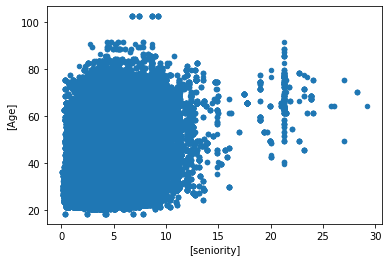

In [ ]:
education_job_seniority.plot.scatter(x=['seniority'], y=['Age'])

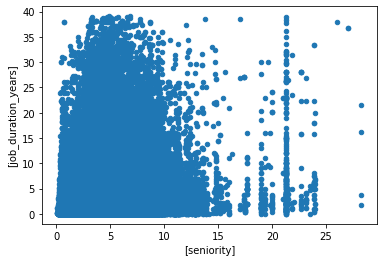

In [ ]:
education_job_seniority.plot.scatter(x=['seniority'], y=['job_duration_years'])

In [ ]:
corr = education_job_seniority.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,education_duration_years,job_duration_years,Age,seniority
education_duration_years,1.00,-0.00,0.15,0.02
job_duration_years,-0.00,1.00,0.37,0.19
Age,0.15,0.37,1.00,0.40
seniority,0.02,0.19,0.40,1.00


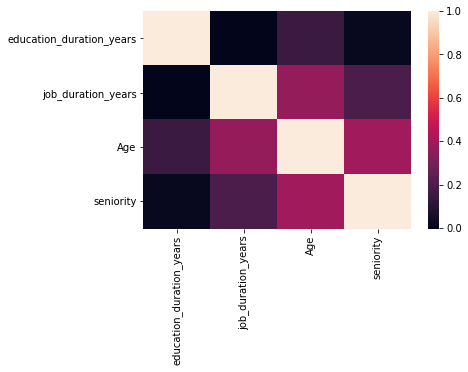

In [ ]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

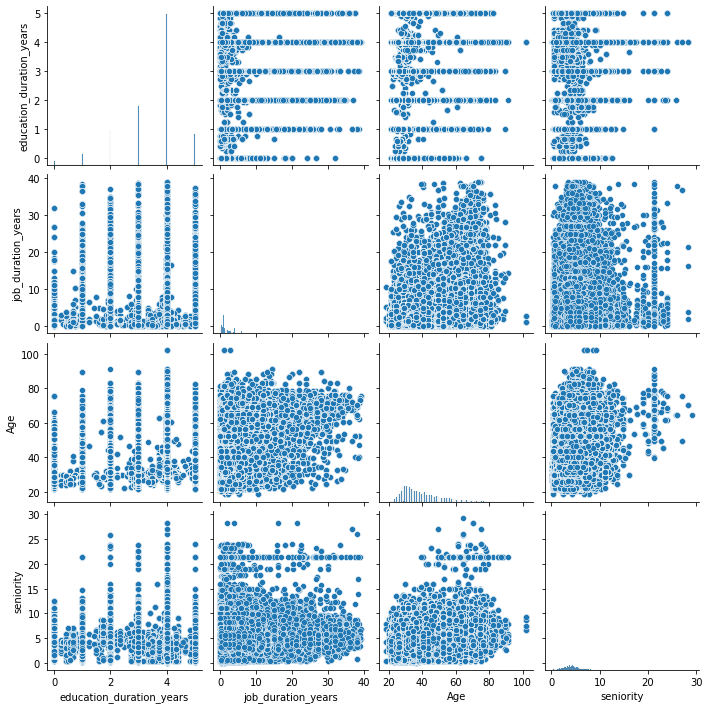

In [ ]:
sns.pairplot(education_job_seniority)


Although we calculated Age based on eduction duration years so I was expecting strong correlation between then but it is even lesses then the job or seniority experience so based on correlation matrix and heatmat and pair plot, we can conclude that Predicting age would bot be biased only for education duration years.

# Age Prediction Model

In [ ]:
## for plotting
import matplotlib.pyplot as plt
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Deleting the missing values after merging multiple dataset

In [ ]:
education_job_seniority.dropna(subset=['Age'])

In [ ]:
education_job_seniority.dropna(subset=['job_duration_years'],inplace=True)

In [ ]:
education_job_seniority.dropna(subset=['education_duration_years'],inplace=True)

In [ ]:
education_job_seniority.dropna(subset=['seniority'],inplace=True)

In [ ]:
education_job_seniority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665857 entries, 0 to 1000014
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   665857 non-null  object 
 1   education_duration_years  665857 non-null  float64
 2   job_duration_years        665857 non-null  float64
 3   jobtitle_x                665028 non-null  object 
 4   Age                       665857 non-null  float64
 5   jobtitle_y                665261 non-null  object 
 6   seniority                 665857 non-null  float64
dtypes: float64(4), object(3)
memory usage: 40.6+ MB


In [ ]:
education_job_seniority['user_id'].describe()

count                                                665857
unique                                                21244
top       bBpn9NDjfza5z8zMxYySZA5+2cvffV/mNepQVJd0smgtpB...
freq                                                   4355
Name: user_id, dtype: object

## Model building 

## Linear Regression

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


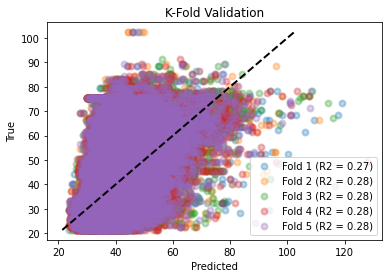

In [ ]:
# Compare Algorithms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

In [ ]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))


Mean Absolute Error: 7.366080611181166
Mean Squared Error: 91.77647720842319
Root Mean Squared Error: 9.580004029666334


In [ ]:

### split data into predictors and response variables

names = ['education_duration_years', 'job_duration_years', 'seniority']
X = education_job_seniority[names].values
Y = education_job_seniority["Age"].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Mean Absolute Error: 7.366080611181166
Mean Squared Error: 91.77647720842319
Root Mean Squared Error: 9.580004029666334


,Actual,Predicted
0,37.340575,39.508440
1,47.342149,50.386152
2,61.341068,50.490539
3,23.341657,31.492899
4,31.341821,35.908097
...,...,...
199753,74.340650,39.345247
199754,29.340411,32.773114
199755,28.341075,43.024103
199756,32.341157,35.946771


Pretty much the same results with K-coss fold or just basic split 

## Decision Tree

In [ ]:

### split data into predictors and response variables

names = ['education_duration_years', 'job_duration_years', 'seniority']
X = education_job_seniority[names].values
Y = education_job_seniority["Age"].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)

model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Mean Absolute Error: 6.740961113841229
Mean Squared Error: 111.7583952186732
Root Mean Squared Error: 10.571584328693273


,Actual,Predicted
0,37.340575,37.340575
1,47.342149,63.342478
2,61.341068,61.341068
3,23.341657,47.342149
4,31.341821,28.341075
...,...,...
199753,74.340650,74.340650
199754,29.340411,27.341739
199755,28.341075,51.340863
199756,32.341157,32.341157


## Ensamble learning


In [ ]:
# Ensamble learning
from sklearn.ensemble import RandomForestRegressor

names = ['education_duration_years', 'job_duration_years', 'seniority']
X = education_job_seniority[names].values
Y = education_job_seniority["Age"].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=0)


RF_model = RandomForestRegressor(n_estimators =100, max_depth =10, random_state=0)
RF_model.fit(X_train,y_train)
RF_predict =RF_model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, RF_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, RF_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RF_predict)))


Mean Absolute Error: 6.996953260942311
Mean Squared Error: 83.71414432216069
Root Mean Squared Error: 9.149543394189717


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})
df

,Actual,Predicted
0,37.340575,38.852554
1,47.342149,57.269409
2,61.341068,50.817753
3,23.341657,28.951476
4,31.341821,35.516944
...,...,...
199753,74.340650,40.075982
199754,29.340411,33.243899
199755,28.341075,46.175636
199756,32.341157,33.498932


Ensamble techniques here using random forest works better in this case with minimum error so I would go with this for building the model.
 

# Evaluation and Results

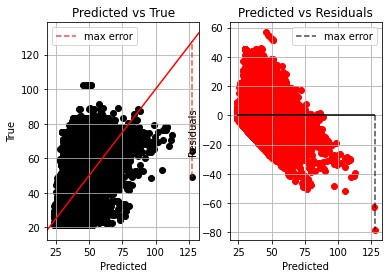

In [ ]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


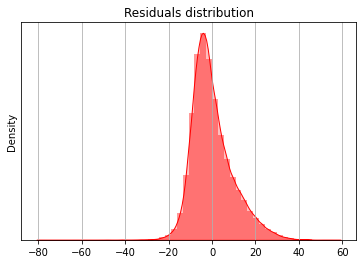

In [ ]:
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()


# Pipeline for automation/streamline the process

Possible extension for creating the pipeline but I have not checked it or ran it.

In [ ]:
import sys
import psycopg2
from scipy import stats
from psycopg2 import extensions

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
#conn = psycopg2.connect(
#    host='127.0.0.1', port='5432', database='postgres',
#    user='postgres', password='password')
#autocommit = extensions.ISOLATION_LEVEL_AUTOCOMMIT
#conn.set_isolation_level(autocommit)
#autocommit = True

In [ ]:
# create a new cursor
#cur = conn.cursor()
#sql = "select * from S3 limit 50"
#cur.execute(sql)
#result = cur.fetchall()
#df = pd.DataFrame(result)
#print(df.head())
#conn.commit()